#### Example resizing an image

In [1]:
tf.random.normal

Original image shape:  (256, 256)


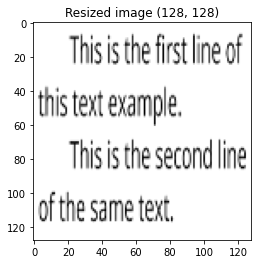

In [3]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from noise import noisify, NoiseTypes

example_image_fp = '../sample_images/text_image.png'
# read image and convert it from BGR to Gray format
image = cv2.cvtColor(cv2.imread(example_image_fp), cv2.COLOR_BGR2GRAY)
print('Original image shape: ', image.shape)
# interpolation is one of cv2.INTER_* (e.g INTER_NEAREST, INTER_LINEAR, INTER_CUBIC, etc)
image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_CUBIC)
# or image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(image, cmap='gray');
plt.title(f'Resized image {image.shape}');

#### Example adding noise to an image

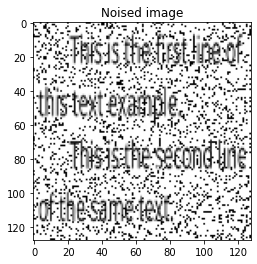

In [6]:
from image_ops import *
from functools import reduce


degr_pipeline = [GaussianNoiseOperation(), SaltPepperOperation()]

image = tf.constant(image)
# noise_type is one of SALT_AND_PEPPER, GAUSSIAN, POISSON, SPECKLE
noised = reduce(lambda image, op: op(image), degr_pipeline, image)
plt.imshow(noised, cmap='gray')
plt.title('Noised image');